# 한글 자연언어처리 실습 문제

> 작성자      
```
* 김성현
박상희
이정우
이녕우
박채훈
```

[CC BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/2.0/kr/)

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

이번 실습에서는 실제 현업에서 필요로 하는 다양한 전처리를 실습해보도록 하겠습니다! :-)
중간 중간에 있는 'myFunction' 부분을 채워서 제출해주세요!


### 개인정보 관련 문제
1. 적절한 비밀번호인지 검증하기
2. 욕설 삐처리하기 (1)
3. 욕설 삐처리하기 (2)
4. 개인정보 마스킹
5. 크롤링된 위키피디아 문서 전처리하기

### 데이터 분석하기
6. 코퍼스 EDA
7. 다양한 토크나이저의 특성 비교해보기




# 1. 보안이 뛰어난 비밀번호인지 검증하기 (난이도: 상)
보안이 뛰어난 비밀번호는 일반적으로 아래와 같은 조건들을 만족해야 합니다.
- 8자리 이상 30글자 미만
- 영어 대문자와 소문자 최소 1개씩 포함
- 하나 이상의 숫자 포함
- 하나 이상의 특수기호 (!@#$%^&*) 포함

주어진 비밀번호들이 위의 조건들을 만족하는지 검증하고, 만족하면 True / 만족하지 않으면 False를 반환하는 함수를 작성해보도록 합시다.

In [3]:
passwords = [
             'BoostCamp2!',
             'IlikeA1@',
             'Mypassword152%',
             '!UltimateChallenge8282',
             'hihi',
             'Boostcamp123',
             '!@#$%^',
             '15821582',
             'ㅋㅋMyPassword2!',

]

labels = [True, True, True,True, False, False, False, False]

In [13]:
import re

def MyFunction(password:str)->bool:
    # 이곳에 코드를 작성해주세요!
    mat = True
    if len(password) < 8 or len(password) >= 30:
        mat = False
    if not re.search('[a-z]', password) or not re.search('[A-Z]', password):
        mat = False
    if not re.search('\d', password):
        mat = False
    if not re.search('[!@#$%^&*]', password):
        mat = False

    return bool(mat)

In [15]:
# 작성한 함수가 비밀번호를 적절히 검증하는지 확인합니다.
for password,label in zip(passwords, labels):
    is_valid = MyFunction(password)
#     print(is_valid)
    assert is_valid == label
print("성공!")

성공!


# 2. 욕설 삐처리하기 (1) (난이도: 하)

**(주의: 문제 2번과 3번에서 보여지는 예시에는 다소 부정적이고 불쾌감을 주는 정보가 포함될 수 있습니다.)**

In [73]:
texts = [
         "아니 새끼아 내가 언제 그렇게 말했냐?",
         "갱좀 똑바로 오라고 병신아ㅋㅋ",
         "흐아 시발 오늘도 차가 어지간히 막히네",
         "뭘 꼬라보노 시발놈이",
         "바로 선긋기 가능... 니들은 이제 좆된거야...",
]

In [74]:
texts

['아니 새끼아 내가 언제 그렇게 말했냐?',
 '갱좀 똑바로 오라고 병신아ㅋㅋ',
 '흐아 시발 오늘도 차가 어지간히 막히네',
 '뭘 꼬라보노 시발놈이',
 '바로 선긋기 가능... 니들은 이제 좆된거야...']

In [18]:
# 욕설 사전
!git clone https://github.com/LDNOOBW/List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words
!git clone https://github.com/doublems/korean-bad-words
!git clone https://github.com/organization/Gentleman/

Cloning into 'List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words'...
remote: Enumerating objects: 480, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 480 (delta 65), reused 62 (delta 62), pack-reused 399
Receiving objects: 100% (480/480), 108.35 KiB | 4.33 MiB/s, done.
Resolving deltas: 100% (250/250), done.
Cloning into 'korean-bad-words'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Receiving objects: 100% (56/56), 218.93 KiB | 6.84 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Cloning into 'Gentleman'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55
Receiving objects: 100% (55/55), 92.54 KiB | 3.08 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [19]:
import json

# 비속어 사전 01
slang_list_01 = []
f = open("./List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words/ko", 'r')
lines = f.readlines()
for line in lines:
    line = line.replace("\n", "")
    slang_list_01.append(line)
f.close()

# 비속어 사전 02
slang_list_02 = []
f = open("./korean-bad-words/korean-bad-words.md", 'r')
lines = f.readlines()
for line in lines:
    line = line.replace("\n", "")
    slang_list_02.append(line)
f.close()

# 비속어 사전 03
with open('./Gentleman/resources/badwords.json') as json_file:
    json_data = json.load(json_file)
slang_list_03 = json_data["badwords"]

# 비속어 사전 통합
slang_list = slang_list_01 + slang_list_02 + slang_list_03
slang_list = list(set(slang_list))

In [21]:
slang_list[:20]

['아구지',
 '삐리넷',
 '오르가슴',
 '씨양념',
 '주뎅이',
 '팬티캔디',
 '븽싄',
 '섹도우즈',
 '시팔',
 '꼬추',
 '그지새키',
 '빠도리',
 '쓰박',
 '개뇨나',
 'ㄷㅐ출',
 '개쇅끼',
 '병딱',
 '게새끼',
 '병신',
 '개뻥']

In [23]:
print(len(slang_list))

3940


In [84]:
slang_list.index('팬티캔디')

5

In [ ]:
slang_regex_str = '|'.join(slang_list) # 얘를 re.sub(slang_regex_str, '***', text)로 적용하면 '니'가 검열됨. 왜...?

In [68]:
def myFunction(text):
    # 문장(text) 중 slang_list에 있는 단어들이 포함되어있으면, 단어를 별표(*) 치환하는 코드를 작성해주세요!
    censored_text = text
    for slang in slang_list:
        if slang in text:
            censored_text = re.sub(slang, '*' * len(slang), censored_text)
    return censored_text

In [75]:
for text in texts:
    filtered_text = myFunction(text)
    print(filtered_text)

아니 **아 내가 언제 그렇게 말했냐?
갱좀 똑바로 오라고 **아ㅋㅋ
흐아 ** 오늘도 차가 어지간히 막히네
뭘 꼬라보노 **놈이
바로 선긋기 가능... 니들은 이제 *된거야...


# 3. 욕설 삐처리하기 (2) (난이도: 중)
욕설 필터링을 피하기 위해 욕설 사이에 특수기호를 넣는 케이스도 많습니다 (e.g., "미@친", "지@@랄하네"). 이런 욕설들도 처리해봅시다!

- 욕설 사이에 들어가는 특수기호는 @ 만으로 한정합니다.
- 특수기호는 최대 2번 들어갈 수 있으며, 연속해서 들어갑니다. (e.g., "꺼@져@라"는 포함하지 않습니다.)

In [141]:
texts = [
         "아니 새@끼아 내가 언제 그렇게 말했냐?",
         "갱좀 똑바로 오라고 병@@신아ㅋㅋ",
         "흐아 시@발 오늘도 차가 어지간히 막히네",
         "뭘 꼬라보노 시@발놈이",
]

In [146]:
def myFunction(text): 
    # 이곳에 코드를 작성해주세요!
    censored_text = text
    for slang in slang_list:
        if slang in re.sub('@', '', censored_text):
            for idx in range(1, len(slang)):
                slang_inlist1 = list(slang)
                slang_inlist1.insert(idx, '@') # 왜 한번에 '@+'으로 처리하는 건 안되는건지?
                slang_modified1 = ''.join(slang_inlist1)
                slang_inlist2 = list(slang)
                slang_inlist2.insert(idx, '@@')
                slang_modified2 = ''.join(slang_inlist2)

                if slang_modified1 in censored_text:
                    censored_text = re.sub(slang_modified1, '*' * len(slang), censored_text)
                if slang_modified2 in censored_text:
                    censored_text = re.sub(slang_modified2, '*' * len(slang), censored_text)
    return censored_text

In [147]:
for text_idx,text in enumerate(texts):
    print(myFunction(text))

아니 **아 내가 언제 그렇게 말했냐?
갱좀 똑바로 오라고 **아ㅋㅋ
흐아 ** 오늘도 차가 어지간히 막히네
뭘 꼬라보노 **놈이


# 4. 자소 문자 제거하기 (난이도: 하)
- 트위터 등의 SNS에서 추출한 데이터에는 한글의 자소가 포함된 텍스트가 많습니다. 이 데이터 내에서 자소만을 분리하여 제거해봅시다.

In [133]:
texts = ["아름다운 밥이네요ㅎㅎㅎ",
"아ㅏㅏㅏ 집에 가고싶다....",
"ㅋㅋㅋㅋㅋㅋㅋㅋ",
"에휴ㅠㅠㅠ 언제 12층까지 올라가냐",
"ㅂㅂㅂ낼 보자",
"I don't know what to say...ㅠㅠ"]

In [134]:
expected_outputs = ['아름다운 밥이네요', '아 집에 가고싶다....', '', '에휴 언제 12층까지 올라가냐', '낼 보자', "I don't know what to say..."]

In [138]:
import re
def MyFunction(text):
    # 이곳에 코드를 작성해주세요!
    new_text = re.sub('[ㄱ-ㅎ|ㅏ-ㅣ]+', '', text)
    return new_text

for text_idx,text in enumerate(texts):
    changed_text = MyFunction(text)
    assert expected_outputs[text_idx] == changed_text
    print("성공!")

성공!
성공!
성공!
성공!
성공!
성공!


# 5. 크롤링된 위키피디아 문서 전처리하기 (난이도: 중)

다음은 크롤링한 위키피디아 페이지를 전처리하는 코드를 작성해봅시다. 크롤링한 위키피디아 문서에는 HTML 태크, 다른 위키피디아 페이지로의 하이퍼링크 등이 포함되어 있습니다. 크롤링한 문서에서 자연어만을 추출하여 반환하는 전처리 코드를 작성해봅시다.

In [155]:
import re
from typing import List

crawled_page = ['<p><b>자연어 처리</b>(自然語處理) 또는 <b>자연 언어 처리</b>(自然言語處理)는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 묘사할 수 있도록 연구하고 이를 구현하는 <a href="/wiki/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5" title="인공지능">인공지능</a>의 주요 분야 중 하나다.',
    '자연 언어 처리는 연구 대상이 언어 이기 때문에 당연하게도 언어 자체를 연구하는 언어학과 언어 현상의 내적 기재를 탐구하는 언어 인지 과학과 연관이 깊다.', 
    '구현을 위해 수학적 통계적 도구를 많이 활용하며 특히 기계학습 도구를 많이 사용하는 대표적인 분야이다.', 
    '정보검색, QA 시스템, 문서 자동 분류, 신문기사 클러스터링, 대화형 Agent 등 다양한 응용이 이루어지고 있다.</p>', 
    '<p>형태소 분석을 통해 나온 결과 중 가장 적합한 형태의 품사를 부착하는 것을 말한다.', 
    '보통 <a href="/w/index.php?title=%ED%83%9C%EA%B1%B0&amp;action=edit&amp;redlink=1" class="new" title="태거 (없는 문서)">태거</a>라고 하는 모듈이 이 기능을 수행한다.', 
    '이는 형태소 분석기가 출력한 다양한 분석 결과 중에서 문맥에 적합한 하나의 분석 결과를 선택하는 <a href="/wiki/%EB%AA%A8%EB%93%88" class="mw-disambig" title="모듈">모듈</a>이라 할 수 있다.', 
    '분석 시 문맥 좌우에 위치한 <a href="/w/index.php?title=%EC%A4%91%EC%9D%98%EC%84%B1&amp;action=edit&amp;redlink=1" class="new" title="중의성 (없는 문서)">중의성</a> 해소의 힌트가 되는 정보를 이용해서 적합한 분석 결과를 선택한다.', 
    '보통 태거는 대규모의 품사부착 말뭉치를 이용해서 구현하는데 <a href="/wiki/%EC%9D%80%EB%8B%89_%EB%A7%88%EB%A5%B4%EC%BD%94%ED%94%84_%EB%AA%A8%EB%8D%B8" class="mw-redirect" title="은닉 마르코프 모델">은닉 마르코프 모델</a>(HMM)이 널리 사용되고 있다. </p>']
clean_page = ['자연어 처리 또는 자연 언어 처리는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 묘사할 수 있도록 연구하고 이를 구현하는 인공지능의 주요 분야 중 하나다.', 
    '자연 언어 처리는 연구 대상이 언어 이기 때문에 당연하게도 언어 자체를 연구하는 언어학과 언어 현상의 내적 기재를 탐구하는 언어 인지 과학과 연관이 깊다.', 
    '구현을 위해 수학적 통계적 도구를 많이 활용하며 특히 기계학습 도구를 많이 사용하는 대표적인 분야이다.', 
    '정보검색, QA 시스템, 문서 자동 분류, 신문기사 클러스터링, 대화형 Agent 등 다양한 응용이 이루어지고 있다.', 
    '형태소 분석을 통해 나온 결과 중 가장 적합한 형태의 품사를 부착하는 것을 말한다.', 
    '보통 태거라고 하는 모듈이 이 기능을 수행한다.', 
    '이는 형태소 분석기가 출력한 다양한 분석 결과 중에서 문맥에 적합한 하나의 분석 결과를 선택하는 모듈이라 할 수 있다.', 
    '분석 시 문맥 좌우에 위치한 중의성 해소의 힌트가 되는 정보를 이용해서 적합한 분석 결과를 선택한다.', 
    '보통 태거는 대규모의 품사부착 말뭉치를 이용해서 구현하는데 은닉 마르코프 모델이 널리 사용되고 있다.']

def make_clean_wiki_page(crawled_page:List[str]):
    # 이곳에 전처리 코드를 작성해주세요!
    sents = []
    for text in crawled_page:
        # remove html
        text = re.sub(r"<[^>]+>\s+(?=<)|<[^>]+>", "", text).strip()
        # remove text in brackets
        text = re.sub(r"\([^()]*\)", "", text).strip()
        if text:
            sents.append(text)
            
    return sents

for clean_text in make_clean_wiki_page(crawled_page):
    print(clean_text)
assert clean_page == make_clean_wiki_page(crawled_page)
print("\n성공!")

자연어 처리 또는 자연 언어 처리는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 묘사할 수 있도록 연구하고 이를 구현하는 인공지능의 주요 분야 중 하나다.
자연 언어 처리는 연구 대상이 언어 이기 때문에 당연하게도 언어 자체를 연구하는 언어학과 언어 현상의 내적 기재를 탐구하는 언어 인지 과학과 연관이 깊다.
구현을 위해 수학적 통계적 도구를 많이 활용하며 특히 기계학습 도구를 많이 사용하는 대표적인 분야이다.
정보검색, QA 시스템, 문서 자동 분류, 신문기사 클러스터링, 대화형 Agent 등 다양한 응용이 이루어지고 있다.
형태소 분석을 통해 나온 결과 중 가장 적합한 형태의 품사를 부착하는 것을 말한다.
보통 태거라고 하는 모듈이 이 기능을 수행한다.
이는 형태소 분석기가 출력한 다양한 분석 결과 중에서 문맥에 적합한 하나의 분석 결과를 선택하는 모듈이라 할 수 있다.
분석 시 문맥 좌우에 위치한 중의성 해소의 힌트가 되는 정보를 이용해서 적합한 분석 결과를 선택한다.
보통 태거는 대규모의 품사부착 말뭉치를 이용해서 구현하는데 은닉 마르코프 모델이 널리 사용되고 있다.

성공!


# 6. 데이터 EDA

사전 언어 모델을 학습하기전에, 학습시킬 Corpus에 대해 이해하는 것은 필수입니다. 텍스트를 입력받아 아래의 값들을 출력하는 함수를 살펴봅시다! 실습에는 (2강) 자연어의 전처리 - 1_한국어_토크나이징 에서 사용된 코퍼스를 활용합니다. 제공된 함수에 덧붙여, 코퍼스 내 각 단어들의 출현 빈도 및 문장 내 단어 개수 분포에 대한 히스토그램도 그려봅시다!

실습의 편의를 위해, 토크나이징은 아래와 같이 어절 단위를 기준으로 진행합니다.
```
sentence = "제임스 얼 "지미" 카터 주니어는 민주당 출신 미국 39번째 대통령 이다."
tokens = sentence.split(" ")
# tokens: ['제임스', '얼', '"지미"', '카터', '주니어는', '민주당', '출신', '미국', '39번째', '대통령', '이다.']
```
밑에 작성된 함수는 데이터셋으로부터 아래의 값들을 추출하는 함수입니다. 각각의 값들이 어떻게 도출되었는지 하나씩 살펴봅시다.

- 주어진 Corpus의 문장의 통계값
    - 전체 문장 개수
    - 최소 및 최대 문장 길이
    - 문장 길이의 평균 및 중앙값
    - unique한 전체 토큰 개수
    - 문장 내의 최소 및 최대 토큰 개수
    - 문장별 토큰 개수의 평균 및 중앙값
    - 코퍼스에서 가장 많이 나온 상위 10개 단어(=토큰)


- 
    - 단어들을 빈도순으로 정렬하여 등장 횟수를 그린 그래프
    - 문장 내 단어 개수 분포에 대한 히스토그램

In [153]:
# !mkdir my_data
# !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1zib1GI8Q5wV08TgYBa2GagqNh4jyfXZz" > /dev/null
# !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1zib1GI8Q5wV08TgYBa2GagqNh4jyfXZz" -o my_data/wiki_20190620_small.txt

In [154]:
with open('my_data/wiki_20190620_small.txt', 'r', encoding='utf-8') as f:
    corpus = [el.strip('\n') for el in f.readlines()]
print("전체 문장 개수: {}".format(len(corpus)))
print("첫번째 문장: {}".format(corpus[0]))

전체 문장 개수: 10000
첫번째 문장: 제임스 얼 "지미" 카터 주니어는 민주당 출신 미국 39번째 대통령 이다.


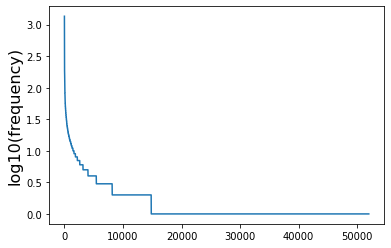

{'TOP10_word': ['있다.', '수', '이', '그', '한다.', '같은', '다음과', '대한', '있는', '또한'],
 'maximum': 374,
 'mean': 56.1671,
 'median': 50.0,
 'minumum': 0,
 'num_unique_words': 51975,
 'texts': 10000,
 'word_maximum': 77,
 'word_mean': 12.8701,
 'word_median': 12.0,
 'word_minumum': 1}

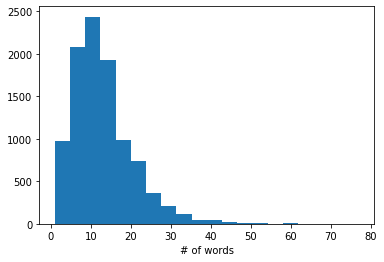

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 띄어쓰기 단위로 토큰화
    for text in texts : 
        texts_lens.append(len(text))
      
        # 띄어쓰기 토큰
        words = text.split(' ')
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=10)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    # TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """
     
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:10]}

myFunction(corpus)

{'texts': 10000,
 'num_unique_words': 51975,
 'maximum': 374,
 'minumum': 0,
 'mean': 56.1671,
 'median': 50.0,
 'word_maximum': 77,
 'word_minumum': 1,
 'word_mean': 12.8701,
 'word_median': 12.0,
 'TOP10_word': ['있다.', '수', '이', '그', '한다.', '같은', '다음과', '대한', '있는', '또한']}

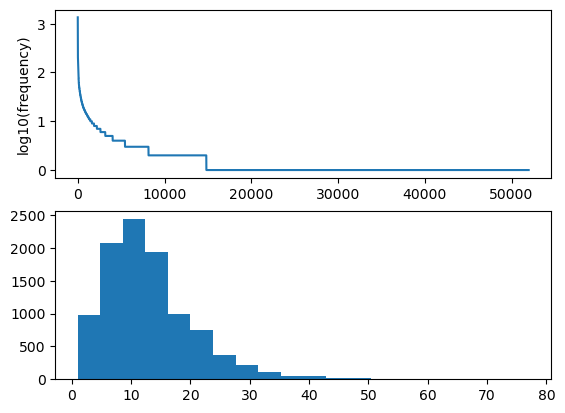

In [189]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import math


def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 띄어쓰기 단위로 토큰화
    for text in texts : 
        texts_lens.append(len(text))
      
        # 띄어쓰기 토큰
        words = text.split(' ')
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=10)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    # TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """
    # 1. 출현 빈도 log-scale 그래프
    plt.subplot(2, 1, 1)
    plt.plot(sorted(map(math.log10, counter.values()), reverse=True))
    plt.ylabel('log10(frequency)')
    
    # 2. 코퍼스 내 각 문장들 단어 개수 히스토그램
    plt.subplot(2, 1, 2)
    plt.hist(word_lens_per_sent, bins=20)
     
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:10]}

myFunction(corpus)

# 7. 다양한 Tokenizer 비교해보기

이번에는 어절 단위 토크나이저 외의 다양한 토크나이저를 통해 위의 코퍼스를 분석해보고, 토크나이저에 따른 차이를 고려해봅시다.

실습에 사용하는 토크나이저들은 아래와 같습니다. 각 토크나이저에 대한 자세한 내용은 (2강) 자연어의 전처리 - 1_한국어_토크나이징.ipynb 에 잘 설명되어 있습니다.
- 음절 단위
- 형태소 단위
- Wordpiece

In [190]:
# # 필요한 라이브러리 설치
# !pip install konlpy
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
# !pip install transformers
# !mkdir wordPieceTokenizer

### 1. 음절 단위 토크나이저

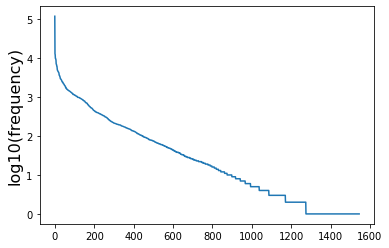

{'TOP10_word': [' ', '이', '다', '의', '.', '는', '에', '하', ',', '로'],
 'maximum': 374,
 'mean': 56.1671,
 'median': 50.0,
 'minumum': 0,
 'num_unique_words': 1546,
 'texts': 10000,
 'word_maximum': 374,
 'word_mean': 56.1671,
 'word_median': 50.0,
 'word_minumum': 0}

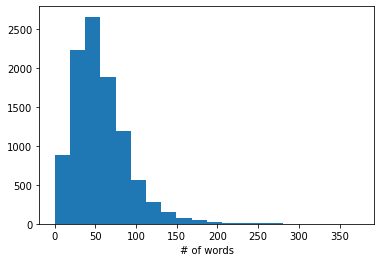

In [ ]:
def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 음절 단위로 토큰화
    for text in texts : 
        texts_lens.append(len(text))
      
        words = list(text)
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=10)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    #TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """
    
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:10]}

myFunction(corpus)



In [ ]:
from konlpy.tag import Kkma
q = Kkma()
q.pos("철수는 영희를 좋아한다.")

[('철수', 'NNG'),
 ('는', 'JX'),
 ('영희', 'NNP'),
 ('를', 'JKO'),
 ('좋아하', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [ ]:
q.pos("철수는 영희를 좋아해.")

[('철수', 'NNG'),
 ('는', 'JX'),
 ('영희', 'NNP'),
 ('를', 'JKO'),
 ('좋아하', 'VV'),
 ('어', 'ECS'),
 ('.', 'SF')]

### 2. 형태소 단위 토크나이저

100%|██████████| 10000/10000 [04:11<00:00, 39.79it/s]


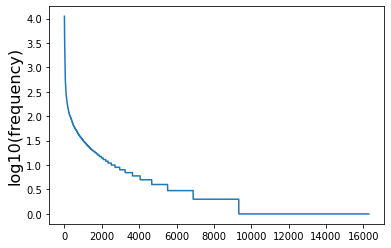

{'TOP10_word': ['하', '.', '이', '의', '는', '다', 'ㄴ', ',', '을', '에'],
 'maximum': 374,
 'mean': 56.1671,
 'median': 50.0,
 'minumum': 0,
 'num_unique_words': 16292,
 'texts': 10000,
 'word_maximum': 185,
 'word_mean': 29.4802,
 'word_median': 27.0,
 'word_minumum': 0}

In [ ]:
from konlpy.tag import Kkma
from tqdm import tqdm

tokenizer=Kkma()  
#text = "싸피에서 열공한 우린, 대한민국을 이끌 SW인재"
#print(tokenizer.morphs(text))
#['싸', '아', '피', '에서', '열', '공한', '우리', 'ㄴ', ',', '대한민국', '을', '이끌', 'ㄹ', 'SW', '인재']

def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 형태소 단위로 토큰화
    for text in tqdm(texts) : 
        texts_lens.append(len(text))
      
        words = tokenizer.morphs(text)
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=10)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    #TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """
     
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:10]}

myFunction(corpus)



### 3. Wordpiece 토크나이저

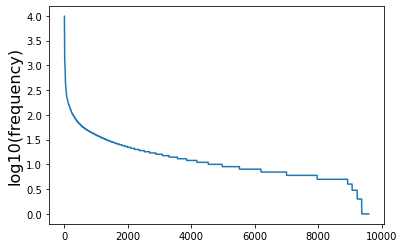

{'TOP10_word': ['.', ',', '##의', '##에', '##을', '##는', '##이', '있다', '##은', '_'],
 'maximum': 374,
 'mean': 56.1671,
 'median': 50.0,
 'minumum': 0,
 'num_unique_words': 9591,
 'texts': 10000,
 'word_maximum': 179,
 'word_mean': 23.5021,
 'word_median': 21.0,
 'word_minumum': 0}

In [ ]:
from tokenizers import BertWordPieceTokenizer

# Initialize an empty tokenizer
wp_tokenizer = BertWordPieceTokenizer(
    clean_text=True,    # [이순신, ##은, ' ', 조선]
    handle_chinese_chars=True,
    strip_accents=False,    # True: [YepHamza] -> [Yep, Hamza]
    lowercase=False,
)
# And then train
wp_tokenizer.train(
    files="my_data/wiki_20190620_small.txt",
    vocab_size=10000,
    min_frequency=2,
    show_progress=True,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"],
    limit_alphabet=1000,
    wordpieces_prefix="##"
)
# Save the files
wp_tokenizer.save_model("wordPieceTokenizer", "my_tokenizer")

def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 Wordpiece 단위로 토큰화
    for text in texts : 
        texts_lens.append(len(text))
      
        words = wp_tokenizer.encode(text).tokens
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=10)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    #TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """

    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:10]}

myFunction(corpus)



4개의 토크나이저를 사용했을 때 달라지는 값들을 표로 정리하면 아래와 같습니다. Unique한 단어의 개수는 어절 토크나이저가 가장 많고 음절 토크나이저가 가장 적으며, 문장 내 단어의 평균 개수는 반대로 음절 토크나이저가 가장 많고 어절 토크나이저가 가장 적습니다. 형태소 및 Wordpiece 토크나이저는 한 문장 내의 단어 개수가 약 20~30개로 비슷하게 나왔으나, Unique한 단어의 개수는 형태소 분석기가 더 많은 것을 알 수 있습니다.

|제목|어절|음절|형태소|Wordpiece|
|------|---|---|---|---|
|Unique word|51975|1546|16292|9591|
|문장 내 단어 개수의 평균|12|56|29|23|
|문장 내 단어 개수의 중앙값|12|50|27|21|
|문장 내 단어 개수의 최대/최소값|77/1|374/0|185/0|179/0|
|빈번한 상위 5개 단어|['있다.', '수', '이', '그', '한다.']|[' ', '이', '다', '의', '.']|['하', '.', '이', '의', '는']|['.', ',', '##의', '##에', '##을']|


이와 같이 동일한 코퍼스를 처리하더라도 사용하는 토크나이저의 특성에 따라 문장을 구성하는 단어의 개수, unique한 단어의 개수 등이 크게 달라집니다. 따라서 코퍼스의 특성 및 모델링의 차이에 따라 적절한 토크나이징 및 전처리 기법을 채택하여 사용하는 것이 중요함을 알 수 있습니다.